House Prediction 15th Feb 2025

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("HousePricePrediction.xlsx")

# Printing first 5 records of the dataset
print(df.head(5))


   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [4]:
df.shape

(2919, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [7]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

Categorical variables: 4


In [8]:
int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

Integer variables: 0


In [34]:
fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Float variables: 3


In [11]:
# EDA Analysis Step 3

<Axes: >

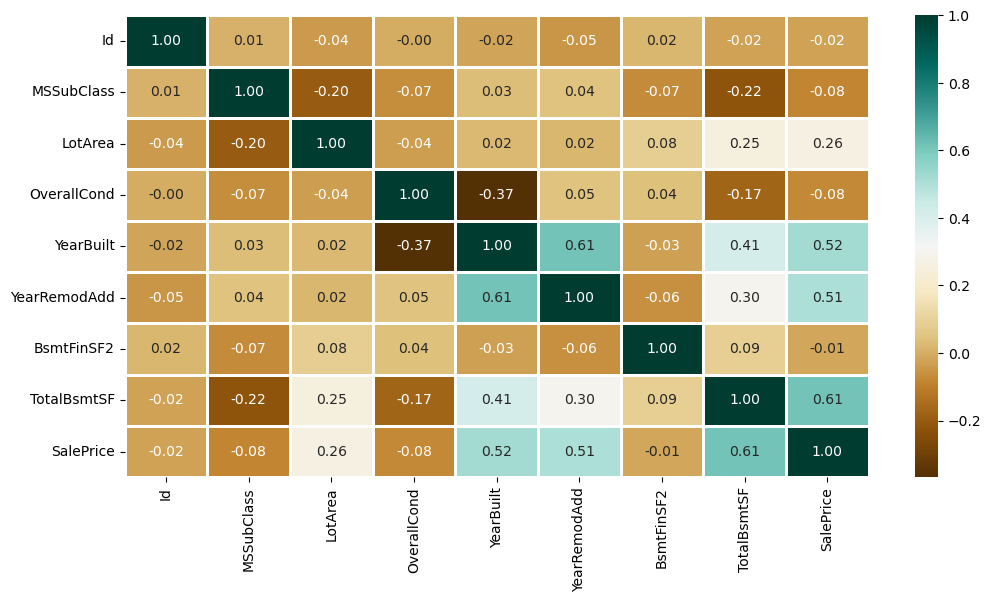

In [13]:
# Select only numerical features for correlation analysis
numerical_dataset = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)




<Axes: title={'center': 'No. Unique values of Categorical Features'}>

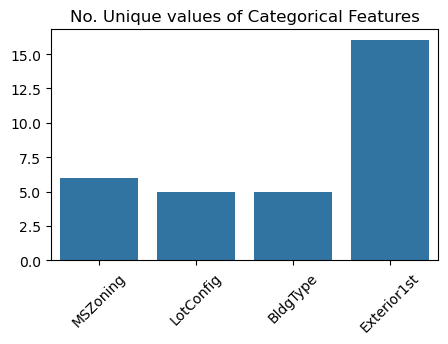

In [19]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(5,3))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=45)
sns.barplot(x=object_cols,y=unique_values)


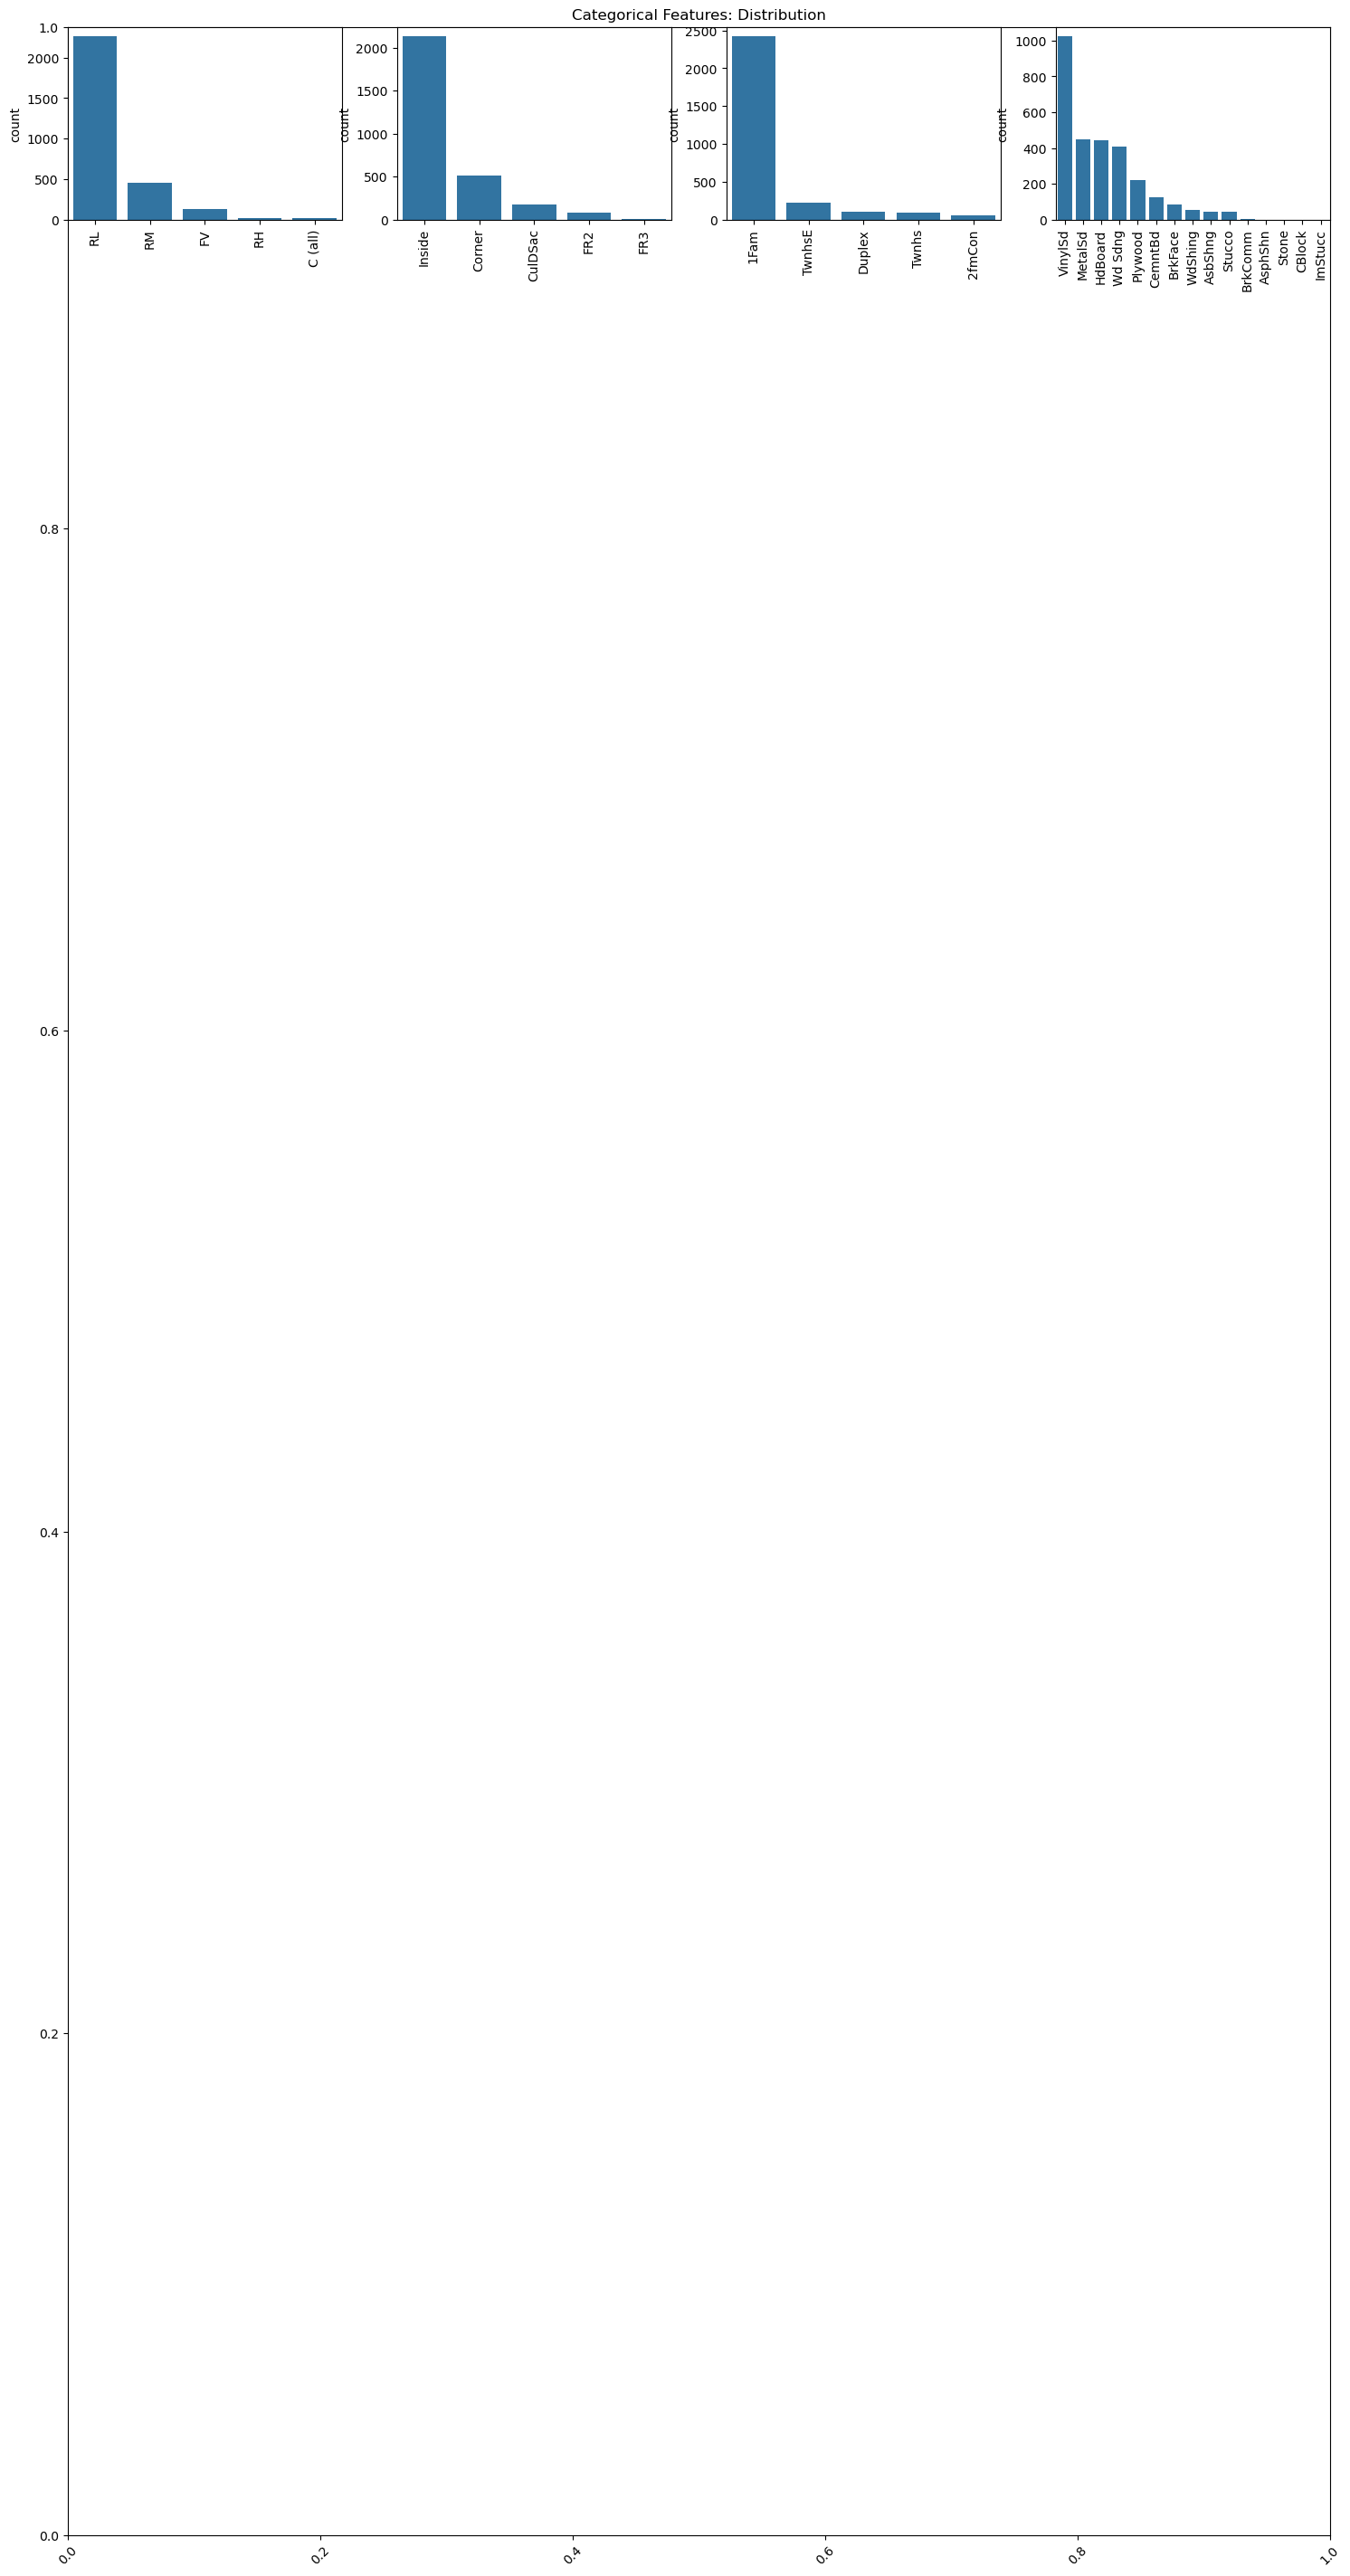

In [24]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=45)
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1


In [36]:
df.drop(['Id'],
             axis=1,
             inplace=True)


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2919 non-null   int64  
 1   MSZoning      2915 non-null   object 
 2   LotArea       2919 non-null   int64  
 3   LotConfig     2919 non-null   object 
 4   BldgType      2919 non-null   object 
 5   OverallCond   2919 non-null   int64  
 6   YearBuilt     2919 non-null   int64  
 7   YearRemodAdd  2919 non-null   int64  
 8   Exterior1st   2918 non-null   object 
 9   BsmtFinSF2    2918 non-null   float64
 10  TotalBsmtSF   2918 non-null   float64
 11  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 273.8+ KB


In [46]:
df['SalePrice'] = df['SalePrice'].fillna(
    df['SalePrice'].mean()
)
print(df['SalePrice'])

0       208500.00000
1       181500.00000
2       223500.00000
3       140000.00000
4       250000.00000
            ...     
2914    180921.19589
2915    180921.19589
2916    180921.19589
2917    180921.19589
2918    180921.19589
Name: SalePrice, Length: 2919, dtype: float64


In [ ]:
# Drop Record with null value

In [48]:
df.isnull().sum()

MSSubClass      0
MSZoning        4
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     1
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64

In [49]:
df_new = df.dropna()

In [50]:
df_new.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [52]:
from sklearn.preprocessing import OneHotEncoder

s = (df_new.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [57]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df_new[object_cols]))
OH_cols.index = df_new.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = df_new.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

# Splitting Dataset into Training and Testing
# X and Y splitting (i.e. Y is the SalePrice column and the rest of the other columns are X)

In [60]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

# SVM – Support vector Machine

In [61]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.1870512931870423


In [62]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


0.1958974404845422

In [63]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.18741683841599951


In [65]:
!pip install catboost
from sklearn.metrics import r2_score

cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid) 

cb_r2_score=r2_score(Y_valid, preds)
cb_r2_score

# This code is modified by Susobhan Akhuli


   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.8/101.7 MB 6.7 MB/s eta 0:00:16
   - -------------------------------------- 3.1/101.7 MB 10.3 MB/s eta 0:00:10
   - -------------------------------------- 4.2/101.7 MB 7.9 MB/s eta 0:00:13
   -- ------------------------------------- 5.2/101.7 MB 7.4 MB/s eta 0:00:13
   -- ------------------------------------- 5.8/101.7 MB 6.9 MB/s eta 0:00:14
   -- ------------------------------------- 6.8/101.7 MB 6.1 MB/s eta 0:00:16
   -- ------------------------------------- 6.8/101.7 MB 6.1 MB/s eta 0:00:16
   -- ------------------------------------- 7.1/101.7 MB 5.0 MB/s eta 0:00:19
   -- ------------------------------------- 7.6/101.7 MB 4.4 MB/s eta 0:00:22
   -- ------------------------------------- 7.6/101.7 MB 4.4 MB/s eta 0:00:22
   -- ------------------------------------- 7.6/101.7 MB 4.4 MB/s eta 0:00:22
   -- ------------------------------------- 7.6/101.7 MB 4.4 MB/s eta 

NameError: name 'CatBoostRegressor' is not defined